<h2>Why use Cuda?</h2>
<h5>Cuda perform compute-intensive operations faster by parallelizing tasks across GPUs </h5>

In [2]:
import torch
 
print(f"Is CUDA supported by this system? {torch.cuda.is_available()}")
print(torch.version.cuda)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

Is CUDA supported by this system? True
11.8
cuda


<h2>Training a Classifier</h2>
<h5>We will do the following steps in order:</h5>
<ol>
    <li>Load and normalize the dog breed training and test datasets using torchvision</li>
    <li>Define a Convolutional Neural Network</li>
    <li>Define a loss function</li>
    <li>Train the network on the training data</li>
    <li>Test the network on the test data</li>
</ol>

<h3>Load and normalize dog breed dataset</h3>

In [3]:
import torch 
from torchvision import datasets, transforms

# # Transforms can be used to transform or augment data for training or inference of different tasks 
# # (image classification, detection, segmentation, video classification)
# transform = transforms.Compose([
#     transforms.Resize(255), # Resize image to same size for training
#     transforms.ToTensor(), # Encode the inputs and outputs of a model to perfrom operation like extracting features
# ]
# )
# # Download dataset from folder using torchvision
# dataset = datasets.ImageFolder('./dogBreeds/images/Images/', transform=transform)
# print(dataset)

# batch_size = 32
# data_loader = torch.utils.data.DataLoader(dataset,batch_size, shuffle=True)

train/Pug directory exists


<h3>Creating custom dataset from files</h3>

In [ ]:
# import pandas as pd
# class DogBreedDataset(Dataset):
#     def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
#         self.image_labels = pd.
        

<h1>Zero to Mastery Learn PyTorch for Deep Learning </h1>
<a href="https://www.learnpytorch.io/04_pytorch_custom_datasets/">link to source</a>


<h2></h2>

<h2>Data Preparation is paramount</h2>
<h5>Before starting a project or building any kind of model, it's important to know what data you're working with</h5>
<h5>In this case, this is image classification, where we have images in seperate directories titled with a particular class</h5>
<h5>The goal will be to <b>take this data storage structure and turn it into a dataset usable with PyTorch</b></h5>

In [10]:
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "train"

# Check if the image folder does exist
if image_path.is_dir():
    print(f"{image_path} directory exists")
else:
    print(f"{image_path} does not exist")

data/train directory exists


<h5>We can inspect what's in our data directory by writing a small helper function to walk through each of the subdirectories and count the files present</h5>

In [11]:
import os
def walk_through_dir(dir_path):
    """
        Walks through dir_path returning its contents.
        Args:
            dir_path (str or pathlib.Path): target directory
        
        Returns:
            A print out of:
            number of subdiretories in dir_path
            number of images (files) in each subdirectory
            name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)

There are 70 directories and 0 images in 'data/train'.
There are 0 directories and 98 images in 'data/train/Rottweiler'.
There are 0 directories and 129 images in 'data/train/Maltese'.
There are 0 directories and 88 images in 'data/train/Dalmation'.
There are 0 directories and 122 images in 'data/train/Dhole'.
There are 0 directories and 109 images in 'data/train/Greyhound'.
There are 0 directories and 198 images in 'data/train/Shih-Tzu'.
There are 0 directories and 125 images in 'data/train/Rhodesian'.
There are 0 directories and 65 images in 'data/train/American Hairless'.
There are 0 directories and 93 images in 'data/train/French Bulldog'.
There are 0 directories and 113 images in 'data/train/Corgi'.
There are 0 directories and 103 images in 'data/train/Pekinese'.
There are 0 directories and 128 images in 'data/train/Bull Mastiff'.
There are 0 directories and 147 images in 'data/train/Bloodhound'.
There are 0 directories and 150 images in 'data/train/Scotch Terrier'.
There are 0 di

<h5>Setup our training and testing paths</h5>

In [13]:
train_dir = "data/train"
test_dir = "data/test"
train_dir,test_dir

('data/train', 'data/test')

<h2>Visualize an image</h2>
<h5>We've seen how our directory structure is formatted. Now in the spirit of the data explorer, it's time to visualize, visualize, visualize!</h5>
<ol>
    <li>Get all of the image paths using pathlib.Path.glob() to find all of the files ending in .jpg</li>
    <li>Pick a random image path using Python's random.choice()</li>
    <li>Get the image class name using pathlib.Path.parent.stem</li>
    <li>And since we're working with images, we'll open the random image path using PIL.Image.open() (PIL stands for Python Image Library)</li>
    <li>We'll then show the image and print some metadata</li>
</ol>


In [32]:
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)
# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")

Random image path: data/train/Basenji/74.jpg
Image class: Basenji
Image height: 224
Image width: 224


<h5>We can do the same with matplotlib.pyplot.imshow(), except we have to convert the image to a NumPy array first</h5>

(-0.5, 223.5, 223.5, -0.5)

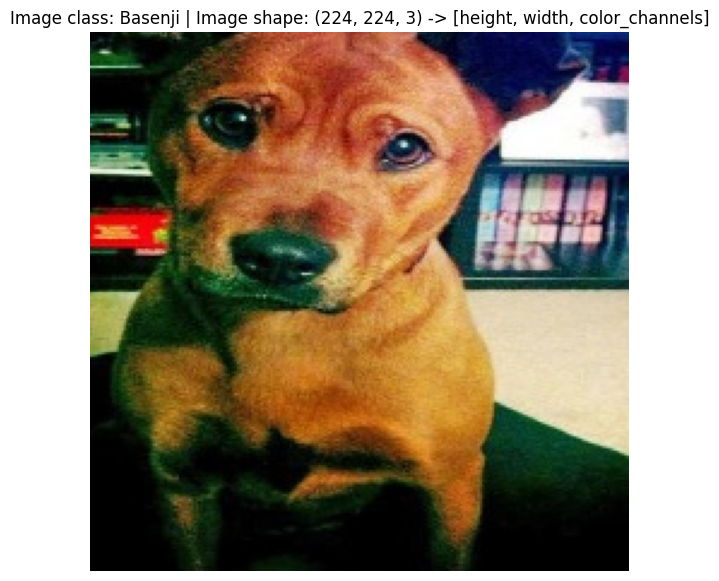

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

<h2>Transforming data</h2>